In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2264\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('D:\CSE445\RTA Data 2020 to July 2023.csv')
df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2264\2212867542.py:1: DtypeWarning: Columns (0,1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:\CSE445\RTA Data 2020 to July 2023.csv')


,EcYear,EcNumber,CallTime,EmergencyArea,TotalPatientsInEmergency,Gender,Age,HospitalName,Reason,responsetime,...,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
0,2020,31486,12/31/20 22:41,NEAR APS SCHOOL FORT ROAD RWP,1,Male,27.0,BBH,Bike Slip,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,31485,12/31/20 22:25,"Infront of Daig.com, Near Dha gate 2, gt road...",1,Male,20.0,NaN,Car hit Footpath,12.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,31483,12/31/20 21:54,Muhammadi chowk arshad bakery khyaban e sirsye...,1,Male,48.0,BBH,Rickshaw hit with Car,10.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020,31482,12/31/20 21:24,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,Male,45.0,NaN,Car hit Car and runaway,5.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,31479,12/31/20 21:03,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,Male,22.0,NaN,Unknown Bike hit Bike and runaway,5.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Cleaning

In [21]:
df.shape

(46189, 25)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46189 entries, 0 to 46188
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EcYear                    46189 non-null  object 
 1   EcNumber                  38978 non-null  object 
 2   CallTime                  40233 non-null  object 
 3   EmergencyArea             46189 non-null  object 
 4   TotalPatientsInEmergency  46189 non-null  object 
 5   Gender                    46188 non-null  object 
 6   Age                       46188 non-null  float64
 7   HospitalName              24239 non-null  object 
 8   Reason                    46188 non-null  object 
 9   responsetime              46184 non-null  float64
 10  EducationTitle            46188 non-null  object 
 11  InjuryType                46187 non-null  object 
 12  Cause                     46187 non-null  object 
 13  PatientStatus             46187 non-null  object 
 14  Bicycl

In [21]:
df.isnull().sum()

EcYear                          0
EcNumber                     7211
CallTime                     5956
EmergencyArea                   0
TotalPatientsInEmergency        0
Gender                          1
Age                             1
HospitalName                21950
Reason                          1
responsetime                    5
EducationTitle                  1
InjuryType                      2
Cause                           2
PatientStatus                   2
BicycleInvovled                 2
BikesInvolved                   2
BusesInvolved                   2
CarsInvolved                    2
CartInvovled                    2
RickshawsInvolved               2
TractorInvovled                 2
TrainsInvovled                  2
TrucksInvolved                  2
VansInvolved                    2
OthersInvolved                  2
dtype: int64


*Visualize the percentage of missing values for each column*

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2264\1136719478.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_null_percentage.index, y=df_null_percentage.values, palette='magma')


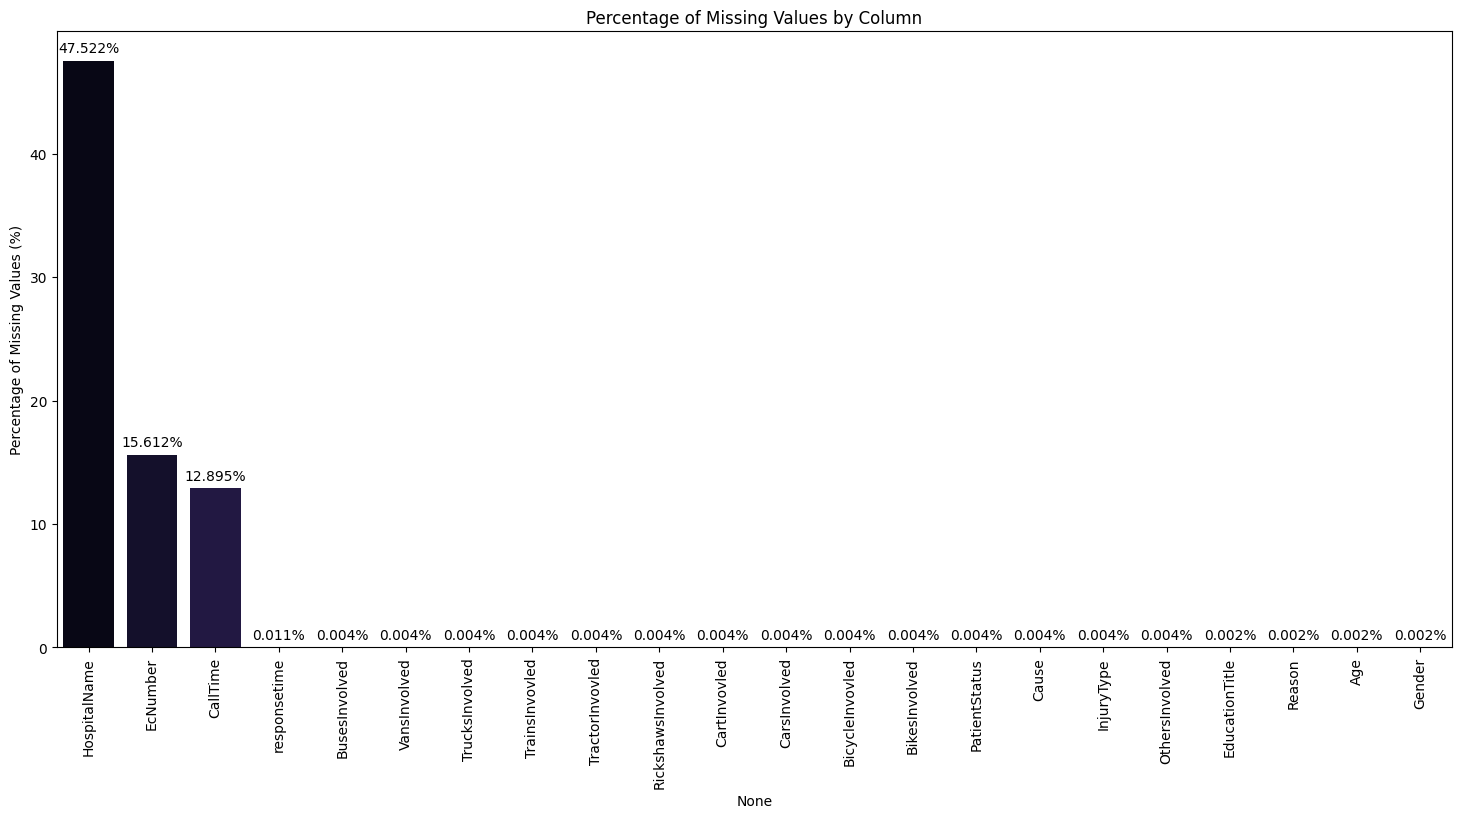

In [20]:

plt.figure(figsize=(18, 8))
ax = sns.barplot(x=df_null_percentage.index, y=df_null_percentage.values, palette='magma')
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage of Missing Values (%)')

# Adding data labels with more decimal precision
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with non-zero height
        ax.annotate(f'{height:.3f}%',  # Use 4 decimal places
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', 
                    xytext=(0, 9), textcoords='offset points')

plt.show()


**CALLTIME HANDLE**

By analysing the dataset the missing values of CallTime portion are not missing. For consequtive two or three rows they are pointed as one single row due to having the same value. Therefore, we handled them by doing forward filling.

In [31]:
df['CallTime'].fillna(method='ffill', inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2264\887593335.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CallTime'].fillna(method='ffill', inplace=True)


**EcNumber HANDLE**

By analysing the dataset the missing values of EcNumber portion are not missing. For consequtive two or three rows they are pointed as one single row due to having the same value. Therefore, we handled them by doing forward filling.

In [32]:
df['EcNumber'].fillna(method='ffill', inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2264\239955805.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EcNumber'].fillna(method='ffill', inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2264\239955805.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['EcNumber'].fillna(method='ffill', inplace=True)


**HospitalName HANDLE**


Drop the HospitalName coloumn as it is less important and have huge NULL values

In [34]:
#drop columns

df.drop(['HospitalName'], axis=1, inplace=True)

In [49]:
df = df.dropna(thresh=len(df.columns) - 2)

mean_responsetime = int(df['responsetime'].mean())  # Calculate integer mean
df['responsetime'].fillna(mean_responsetime, inplace=True)  # Fill NaN with mean

# Output the cleaned DataFrame to check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46187 entries, 0 to 46188
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EcYear                    46187 non-null  object 
 1   EcNumber                  46187 non-null  object 
 2   CallTime                  46187 non-null  object 
 3   EmergencyArea             46187 non-null  object 
 4   TotalPatientsInEmergency  46187 non-null  object 
 5   Gender                    46187 non-null  object 
 6   Age                       46187 non-null  float64
 7   Reason                    46187 non-null  object 
 8   responsetime              46187 non-null  float64
 9   EducationTitle            46187 non-null  object 
 10  InjuryType                46187 non-null  object 
 11  Cause                     46187 non-null  object 
 12  PatientStatus             46187 non-null  object 
 13  BicycleInvovled           46187 non-null  float64
 14  BikesInvolv

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2264\1585802686.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['responsetime'].fillna(mean_responsetime, inplace=True)  # Fill NaN with mean
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2264\1585802686.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['responsetime'].fillna(mean_responsetim

In [50]:
df.isnull().sum()

EcYear                      0
EcNumber                    0
CallTime                    0
EmergencyArea               0
TotalPatientsInEmergency    0
Gender                      0
Age                         0
Reason                      0
responsetime                0
EducationTitle              0
InjuryType                  0
Cause                       0
PatientStatus               0
BicycleInvovled             0
BikesInvolved               0
BusesInvolved               0
CarsInvolved                0
CartInvovled                0
RickshawsInvolved           0
TractorInvovled             0
TrainsInvovled              0
TrucksInvolved              0
VansInvolved                0
OthersInvolved              0
dtype: int64

In [55]:
df.shape

(46187, 24)

*Dropping duplicate coloumns*

In [54]:
df[df.duplicated()]

,EcYear,EcNumber,CallTime,EmergencyArea,TotalPatientsInEmergency,Gender,Age,Reason,responsetime,EducationTitle,...,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
745,2020,28856,12/4/20 19:30,Near sehal village chakri road Rwp,4,Male,42.0,same,8.0,Matric,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1546,2020,26305,11/8/20 14:54,Infront of ashraf marriage hall dhoke hafiz ...,3,Male,16.0,same,3.0,Matric,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6037,2020,12529,5/20/20 7:50,Near flying Club Old airport road rwp,3,Male,18.0,Same,7.0,Primary,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8301,2020,3960,2/8/20 11:36,Main Ali Nawaz Chowk Khatarnaak More Rawal Roa...,5,Male,17.0,same,7.0,Matric,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9573,2020,1085,10/1/20 10:50,Infront Of BAwali Hotel T/W Mandra GT Road Guj...,4,Male,50.0,same,6.0,Primary,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11314,2020,35,1/8/20 14:30,"Dhoke Muqadam Stop, Near Attock Pump/ LRBT, G ...",5,Female,45.0,Same,7.0,Middle,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
12518,2021,33935,11/28/21 5:49,ranial near ranial choki chakri road rwp,4,Male,27.0,Same,8.0,Illetrate,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17488,2021,15461,6/11/21 2:48,"NEAR BRIDGE,BHARIATOWN PHASE 1,NEAR SIFFARI VI...",3,Male,18.0,Same,12.0,Primary,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21791,2021,1582,11/9/21 11:28,Missa Kaswal GT Road Gujjar Khan Rwp,8,Male,30.0,same,10.0,Illetrate,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
23862,2021,93,6/11/21 8:05,AZAD PATTAN AZAD KASHMIR KAHUTA,5,Male,40.0,same,53.0,Illetrate,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [58]:
df = df.drop_duplicates()
df.shape

(46159, 24)

In [59]:
df.head()

,EcYear,EcNumber,CallTime,EmergencyArea,TotalPatientsInEmergency,Gender,Age,Reason,responsetime,EducationTitle,...,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
0,2020,31486,12/31/20 22:41,NEAR APS SCHOOL FORT ROAD RWP,1,Male,27.0,Bike Slip,10.0,Intermediate,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,31485,12/31/20 22:25,"Infront of Daig.com, Near Dha gate 2, gt road...",1,Male,20.0,Car hit Footpath,12.0,Illetrate,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,31483,12/31/20 21:54,Muhammadi chowk arshad bakery khyaban e sirsye...,1,Male,48.0,Rickshaw hit with Car,10.0,Illetrate,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020,31482,12/31/20 21:24,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,Male,45.0,Car hit Car and runaway,5.0,Matric,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,31479,12/31/20 21:03,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,Male,22.0,Unknown Bike hit Bike and runaway,5.0,Matric,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# END OF UPDATE BY SAMIUL

In [23]:
df.describe()

,Age,responsetime,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
count,46188.000000,46184.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000
mean,32.447129,6.256106,0.008725,0.967242,0.009202,0.234049,0.001970,0.087297,0.009830,0.002208,0.044948,0.117392,0.009656
std,15.176229,4.901342,0.093467,0.578776,0.100349,0.448054,0.044344,0.289319,0.098657,0.046942,0.220947,0.334686,0.098893
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,118.000000,101.000000,2.000000,10.000000,2.000000,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,4.000000,2.000000


In [27]:
a= pd.get_dummies(df, columns = ['PatientStatus'])
a

,EcYear,EmergencyArea,TotalPatientsInEmergency,Gender,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,...,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved,PatientStatus_Alive & stable,PatientStatus_Alive & unstable,PatientStatus_Dead
0,2020,NEAR APS SCHOOL FORT ROAD RWP,1,Male,27.0,Bike Slip,10.0,Intermediate,Minor,Over Speed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False
1,2020,"Infront of Daig.com, Near Dha gate 2, gt road...",1,Male,20.0,Car hit Footpath,12.0,Illetrate,Minor,Over Speed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False
2,2020,Muhammadi chowk arshad bakery khyaban e sirsye...,1,Male,48.0,Rickshaw hit with Car,10.0,Illetrate,Single Fracture,Over Speed,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False,True,False
3,2020,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,Male,45.0,Car hit Car and runaway,5.0,Matric,Minor,Over Speed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False
4,2020,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,Male,22.0,Unknown Bike hit Bike and runaway,5.0,Matric,Single Fracture,Over Speed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46184,2023,Infront Of Mian G hotel GT Road Mandra,2,Male,20.0,.,3.0,Illetrate,Single Fracture,Carelessness,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,False,True,False
46185,2023,"Barma Shell Depu Dhoke Munshi Road, Fazal Town...",1,Male,16.0,Bike slipped due to over speed.(RIN.6276) C D...,11.0,Illetrate,Minor,Carelessness,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False
46186,2023,Main Bakra Mandi Chowk Rwp,1,Female,10.0,RLF-2193 coure and ICT-593 corolla car colliped,1.0,Primary,Minor,Carelessness,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False
46187,2023,"Darbar Adda, Mandi Morr, Bus Stop, Ijp Road, Rwp",1,Male,19.0,Bike slipped due to Over speed ( Bike no TSH ...,12.0,Primary,Minor,Over Speed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False


In [28]:
a['PatientStatus_Alive & stable']

0        False
1         True
2        False
3         True
4         True
         ...  
46184    False
46185    False
46186     True
46187     True
46188     True
Name: PatientStatus_Alive & stable, Length: 46189, dtype: bool

In [29]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46189 entries, 0 to 46188
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   EcYear                          46189 non-null  object 
 1   EmergencyArea                   46189 non-null  object 
 2   TotalPatientsInEmergency        46189 non-null  object 
 3   Gender                          46188 non-null  object 
 4   Age                             46188 non-null  float64
 5   Reason                          46188 non-null  object 
 6   responsetime                    46184 non-null  float64
 7   EducationTitle                  46188 non-null  object 
 8   InjuryType                      46187 non-null  object 
 9   Cause                           46187 non-null  object 
 10  BicycleInvovled                 46187 non-null  float64
 11  BikesInvolved                   46187 non-null  float64
 12  BusesInvolved                   

In [30]:

!pip install scikit-learn

In [31]:
#patient status one hot encoding
from sklearn.preprocessing import OneHotEncoder
arr = OneHotEncoder(drop='first').fit_transform(df[['PatientStatus']]).toarray()
en_df = pd.DataFrame(arr, columns=["Alive & unstable","Alive & stable","Dead"])
df = pd.concat([df, en_df], axis=1)
df

,EcYear,EmergencyArea,TotalPatientsInEmergency,Gender,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,...,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved,Alive & unstable,Alive & stable,Dead
0,2020,NEAR APS SCHOOL FORT ROAD RWP,1,Male,27.0,Bike Slip,10.0,Intermediate,Minor,Over Speed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2020,"Infront of Daig.com, Near Dha gate 2, gt road...",1,Male,20.0,Car hit Footpath,12.0,Illetrate,Minor,Over Speed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,Muhammadi chowk arshad bakery khyaban e sirsye...,1,Male,48.0,Rickshaw hit with Car,10.0,Illetrate,Single Fracture,Over Speed,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2020,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,Male,45.0,Car hit Car and runaway,5.0,Matric,Minor,Over Speed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,Male,22.0,Unknown Bike hit Bike and runaway,5.0,Matric,Single Fracture,Over Speed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46184,2023,Infront Of Mian G hotel GT Road Mandra,2,Male,20.0,.,3.0,Illetrate,Single Fracture,Carelessness,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
46185,2023,"Barma Shell Depu Dhoke Munshi Road, Fazal Town...",1,Male,16.0,Bike slipped due to over speed.(RIN.6276) C D...,11.0,Illetrate,Minor,Carelessness,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
46186,2023,Main Bakra Mandi Chowk Rwp,1,Female,10.0,RLF-2193 coure and ICT-593 corolla car colliped,1.0,Primary,Minor,Carelessness,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46187,2023,"Darbar Adda, Mandi Morr, Bus Stop, Ijp Road, Rwp",1,Male,19.0,Bike slipped due to Over speed ( Bike no TSH ...,12.0,Primary,Minor,Over Speed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
#ECyear encoding using ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

# Convert 'EcYear' column to a uniform data type (string)
df['EcYear'] = df['EcYear'].astype(str)

enc = OrdinalEncoder()
df['EcYear'] = enc.fit_transform(df[['EcYear']])
df

,EcYear,EmergencyArea,TotalPatientsInEmergency,Gender,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,...,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved,Alive & unstable,Alive & stable,Dead
0,0.0,NEAR APS SCHOOL FORT ROAD RWP,1,Male,27.0,Bike Slip,10.0,Intermediate,Minor,Over Speed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,"Infront of Daig.com, Near Dha gate 2, gt road...",1,Male,20.0,Car hit Footpath,12.0,Illetrate,Minor,Over Speed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,Muhammadi chowk arshad bakery khyaban e sirsye...,1,Male,48.0,Rickshaw hit with Car,10.0,Illetrate,Single Fracture,Over Speed,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,Male,45.0,Car hit Car and runaway,5.0,Matric,Minor,Over Speed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,Male,22.0,Unknown Bike hit Bike and runaway,5.0,Matric,Single Fracture,Over Speed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46184,3.0,Infront Of Mian G hotel GT Road Mandra,2,Male,20.0,.,3.0,Illetrate,Single Fracture,Carelessness,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
46185,3.0,"Barma Shell Depu Dhoke Munshi Road, Fazal Town...",1,Male,16.0,Bike slipped due to over speed.(RIN.6276) C D...,11.0,Illetrate,Minor,Carelessness,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
46186,3.0,Main Bakra Mandi Chowk Rwp,1,Female,10.0,RLF-2193 coure and ICT-593 corolla car colliped,1.0,Primary,Minor,Carelessness,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46187,3.0,"Darbar Adda, Mandi Morr, Bus Stop, Ijp Road, Rwp",1,Male,19.0,Bike slipped due to Over speed ( Bike no TSH ...,12.0,Primary,Minor,Over Speed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df.isnull().sum()

EcYear                      0
EmergencyArea               0
TotalPatientsInEmergency    0
Gender                      1
Age                         1
Reason                      1
responsetime                5
EducationTitle              1
InjuryType                  2
Cause                       2
PatientStatus               2
BicycleInvovled             2
BikesInvolved               2
BusesInvolved               2
CarsInvolved                2
CartInvovled                2
RickshawsInvolved           2
TractorInvovled             2
TrainsInvovled              2
TrucksInvolved              2
VansInvolved                2
OthersInvolved              2
Alive & unstable            0
Alive & stable              0
Dead                        0
dtype: int64

In [34]:
#Gender missing value fill
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3876\2175688916.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)


In [35]:
df.isnull().sum()

EcYear                      0
EmergencyArea               0
TotalPatientsInEmergency    0
Gender                      0
Age                         1
Reason                      1
responsetime                5
EducationTitle              1
InjuryType                  2
Cause                       2
PatientStatus               2
BicycleInvovled             2
BikesInvolved               2
BusesInvolved               2
CarsInvolved                2
CartInvovled                2
RickshawsInvolved           2
TractorInvovled             2
TrainsInvovled              2
TrucksInvolved              2
VansInvolved                2
OthersInvolved              2
Alive & unstable            0
Alive & stable              0
Dead                        0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46189 entries, 0 to 46188
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EcYear                    46189 non-null  float64
 1   EmergencyArea             46189 non-null  object 
 2   TotalPatientsInEmergency  46189 non-null  object 
 3   Gender                    46189 non-null  object 
 4   Age                       46188 non-null  float64
 5   Reason                    46188 non-null  object 
 6   responsetime              46184 non-null  float64
 7   EducationTitle            46188 non-null  object 
 8   InjuryType                46187 non-null  object 
 9   Cause                     46187 non-null  object 
 10  PatientStatus             46187 non-null  object 
 11  BicycleInvovled           46187 non-null  float64
 12  BikesInvolved             46187 non-null  float64
 13  BusesInvolved             46187 non-null  float64
 14  CarsIn

In [37]:
#Reason missing value fill
df["Reason"].fillna(df["Reason"].mode()[0], inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3876\2017973577.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Reason"].fillna(df["Reason"].mode()[0], inplace=True)


In [38]:
df.fillna(method='ffill', inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3876\3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [39]:
#Gender one hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first')
arr = encoder.fit_transform(df[['Gender']]).toarray()
#en_df = pd.DataFrame(arr, columns= OneHotEncoder().get_feature_names_out(['Gender']))
en_df = pd.DataFrame(arr, columns= encoder.get_feature_names_out(['Gender']))
df = pd.concat([df, en_df], axis=1)
df.drop(['Gender'], axis=1, inplace=True)
df

,EcYear,EmergencyArea,TotalPatientsInEmergency,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,PatientStatus,...,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved,Alive & unstable,Alive & stable,Dead,Gender_Female,Gender_Male,Gender_Other
0,0.0,NEAR APS SCHOOL FORT ROAD RWP,1,27.0,Bike Slip,10.0,Intermediate,Minor,Over Speed,Alive & unstable,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,"Infront of Daig.com, Near Dha gate 2, gt road...",1,20.0,Car hit Footpath,12.0,Illetrate,Minor,Over Speed,Alive & stable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,Muhammadi chowk arshad bakery khyaban e sirsye...,1,48.0,Rickshaw hit with Car,10.0,Illetrate,Single Fracture,Over Speed,Alive & unstable,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,45.0,Car hit Car and runaway,5.0,Matric,Minor,Over Speed,Alive & stable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,22.0,Unknown Bike hit Bike and runaway,5.0,Matric,Single Fracture,Over Speed,Alive & stable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46184,3.0,Infront Of Mian G hotel GT Road Mandra,2,20.0,.,3.0,Illetrate,Single Fracture,Carelessness,Alive & unstable,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
46185,3.0,"Barma Shell Depu Dhoke Munshi Road, Fazal Town...",1,16.0,Bike slipped due to over speed.(RIN.6276) C D...,11.0,Illetrate,Minor,Carelessness,Alive & unstable,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
46186,3.0,Main Bakra Mandi Chowk Rwp,1,10.0,RLF-2193 coure and ICT-593 corolla car colliped,1.0,Primary,Minor,Carelessness,Alive & stable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
46187,3.0,"Darbar Adda, Mandi Morr, Bus Stop, Ijp Road, Rwp",1,19.0,Bike slipped due to Over speed ( Bike no TSH ...,12.0,Primary,Minor,Over Speed,Alive & stable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [40]:
#drop gender column


In [41]:
#apply frequency encoding on EmergencyArea column
freq = df.groupby('EmergencyArea').size()/len(df)
df['EmergencyArea'] = df['EmergencyArea'].map(freq)
df


,EcYear,EmergencyArea,TotalPatientsInEmergency,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,PatientStatus,...,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved,Alive & unstable,Alive & stable,Dead,Gender_Female,Gender_Male,Gender_Other
0,0.0,0.000022,1,27.0,Bike Slip,10.0,Intermediate,Minor,Over Speed,Alive & unstable,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.000022,1,20.0,Car hit Footpath,12.0,Illetrate,Minor,Over Speed,Alive & stable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.000022,1,48.0,Rickshaw hit with Car,10.0,Illetrate,Single Fracture,Over Speed,Alive & unstable,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.000022,1,45.0,Car hit Car and runaway,5.0,Matric,Minor,Over Speed,Alive & stable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.000022,1,22.0,Unknown Bike hit Bike and runaway,5.0,Matric,Single Fracture,Over Speed,Alive & stable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46184,3.0,0.000043,2,20.0,.,3.0,Illetrate,Single Fracture,Carelessness,Alive & unstable,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
46185,3.0,0.000043,1,16.0,Bike slipped due to over speed.(RIN.6276) C D...,11.0,Illetrate,Minor,Carelessness,Alive & unstable,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
46186,3.0,0.000022,1,10.0,RLF-2193 coure and ICT-593 corolla car colliped,1.0,Primary,Minor,Carelessness,Alive & stable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
46187,3.0,0.000022,1,19.0,Bike slipped due to Over speed ( Bike no TSH ...,12.0,Primary,Minor,Over Speed,Alive & stable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
df['EmergencyArea'].value_counts()

EmergencyArea
0.000022    32371
0.000043     7660
0.000065     2238
0.000087      848
0.000108      605
0.000130      396
0.000152      266
0.000238      209
0.000195      207
0.000173      192
0.000346      128
0.000433      120
0.000217      120
0.000390      108
0.000281       78
0.000325       75
0.000260       72
0.000368       68
0.000303       56
0.000476       44
0.000455       42
0.000909       42
0.000411       38
0.000823       38
0.000714       33
0.000671       31
0.000628       29
0.000606       28
0.000520       24
0.000498       23
Name: count, dtype: int64

In [43]:
#reason column print
df['Reason'].value_counts().unique()

array([2329, 1323, 1223, 1015,  957,  956,  647,  476,  381,  375,  364,
        334,  299,  261,  223,  207,  189,  172,  166,  151,  149,  147,
        145,  141,  140,  138,  122,  121,  109,  103,  102,  100,   98,
         92,   89,   78,   73,   72,   69,   67,   66,   64,   62,   56,
         55,   51,   50,   49,   48,   47,   46,   45,   44,   43,   41,
         39,   38,   37,   36,   35,   34,   33,   32,   31,   30,   29,
         28,   26,   25,   24,   23,   22,   21,   20,   19,   18,   17,
         16,   15,   14,   13,   12,   11,   10,    9,    8,    7,    6,
          5,    4,    3,    2,    1], dtype=int64)

In [44]:
df.head(50)


,EcYear,EmergencyArea,TotalPatientsInEmergency,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,PatientStatus,...,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved,Alive & unstable,Alive & stable,Dead,Gender_Female,Gender_Male,Gender_Other
0,0.0,0.000022,1,27.0,Bike Slip,10.0,Intermediate,Minor,Over Speed,Alive & unstable,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.000022,1,20.0,Car hit Footpath,12.0,Illetrate,Minor,Over Speed,Alive & stable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.000022,1,48.0,Rickshaw hit with Car,10.0,Illetrate,Single Fracture,Over Speed,Alive & unstable,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.000022,1,45.0,Car hit Car and runaway,5.0,Matric,Minor,Over Speed,Alive & stable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.000022,1,22.0,Unknown Bike hit Bike and runaway,5.0,Matric,Single Fracture,Over Speed,Alive & stable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.000022,1,50.0,Bike hit Bike and runaway,6.0,Matric,Minor,Over Speed,Alive & stable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.000022,1,18.0,Bike Slip,5.0,Matric,Head Injury,Over Speed,Alive & unstable,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.000022,1,25.0,"Fall from bike, where patient tak lift from bi...",4.0,Primary,Single Fracture,Carelessness,Alive & unstable,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.000022,1,18.0,Bike Slip due to Oil on Road,4.0,Matric,Single Fracture,Carelessness,Alive & unstable,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.000022,1,19.0,Rickshaw hit Pedestrian and runaway,3.0,Matric,Minor,Carelessness,Alive & stable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
#injuri type data value print
#df['InjuryType'].value_counts()
df['InjuryType'].unique()


array(['Minor', 'Single Fracture', 'Head Injury', 'Multiple Fractures',
       'Spinal Injury'], dtype=object)

In [46]:
#InjuryType one hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
arr = encoder.fit_transform(df[['InjuryType']]).toarray()
en_df = pd.DataFrame(arr, columns=encoder.get_feature_names_out(['InjuryType']))
df = pd.concat([df, en_df], axis=1)
df.drop(['InjuryType'], axis=1, inplace=True)
df

,EcYear,EmergencyArea,TotalPatientsInEmergency,Age,Reason,responsetime,EducationTitle,Cause,PatientStatus,BicycleInvovled,...,Alive & stable,Dead,Gender_Female,Gender_Male,Gender_Other,InjuryType_Head Injury,InjuryType_Minor,InjuryType_Multiple Fractures,InjuryType_Single Fracture,InjuryType_Spinal Injury
0,0.0,0.000022,1,27.0,Bike Slip,10.0,Intermediate,Over Speed,Alive & unstable,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.000022,1,20.0,Car hit Footpath,12.0,Illetrate,Over Speed,Alive & stable,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.000022,1,48.0,Rickshaw hit with Car,10.0,Illetrate,Over Speed,Alive & unstable,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.000022,1,45.0,Car hit Car and runaway,5.0,Matric,Over Speed,Alive & stable,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.000022,1,22.0,Unknown Bike hit Bike and runaway,5.0,Matric,Over Speed,Alive & stable,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46184,3.0,0.000043,2,20.0,.,3.0,Illetrate,Carelessness,Alive & unstable,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
46185,3.0,0.000043,1,16.0,Bike slipped due to over speed.(RIN.6276) C D...,11.0,Illetrate,Carelessness,Alive & unstable,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
46186,3.0,0.000022,1,10.0,RLF-2193 coure and ICT-593 corolla car colliped,1.0,Primary,Carelessness,Alive & stable,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
46187,3.0,0.000022,1,19.0,Bike slipped due to Over speed ( Bike no TSH ...,12.0,Primary,Over Speed,Alive & stable,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46189 entries, 0 to 46188
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   EcYear                         46189 non-null  float64
 1   EmergencyArea                  46189 non-null  float64
 2   TotalPatientsInEmergency       46189 non-null  object 
 3   Age                            46189 non-null  float64
 4   Reason                         46189 non-null  object 
 5   responsetime                   46189 non-null  float64
 6   EducationTitle                 46189 non-null  object 
 7   Cause                          46189 non-null  object 
 8   PatientStatus                  46189 non-null  object 
 9   BicycleInvovled                46189 non-null  float64
 10  BikesInvolved                  46189 non-null  float64
 11  BusesInvolved                  46189 non-null  float64
 12  CarsInvolved                   46189 non-null 